<a href="https://colab.research.google.com/github/epic-coder97/Data-602/blob/main/Homework_%7C_Week_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Week 5 Homework Data 602
*Nikita Dharmadhikari*


---
Step 1: 
- Import key libraries.
- Use ‘matplotlib.rcParams.update({'font.size': 12})’.
- Use the Boston dataset from sklearn.datasets.
- Load the LinearRegression and Ridge libraries

In [58]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
import pandas as pd
from sklearn.model_selection import train_test_split

Step 2 
- Load the ‘mlb.csv’ dataset
- Use salary as the target
- Drop ‘League’, ‘Division’, and ‘NewLeage’ from the features.

In [59]:
data = pd.read_csv("/content/drive/MyDrive/DATA 602 Spring 2022/Data Files/mlb.csv")
data.shape

(322, 20)

In [60]:
data.drop(['Division', 'NewLeague', 'League'], axis=1, inplace=True)


In [61]:
data.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors', 'Salary'],
      dtype='object')

In [62]:

data.isnull().sum()

AtBat       0
Hits        0
HmRun       0
Runs        0
RBI         0
Walks       0
Years       0
CAtBat      0
CHits       0
CHmRun      0
CRuns       0
CRBI        0
CWalks      0
PutOuts     0
Assists     0
Errors      0
Salary     59
dtype: int64

In [63]:
data.dropna(inplace= True)

In [64]:
data.shape


(263, 17)

In [65]:
X = data['Salary']
X.dropna()
X

1       475.0
2       480.0
3       500.0
4        91.5
5       750.0
        ...  
317     700.0
318     875.0
319     385.0
320     960.0
321    1000.0
Name: Salary, Length: 263, dtype: float64

In [66]:
X

1       475.0
2       480.0
3       500.0
4        91.5
5       750.0
        ...  
317     700.0
318     875.0
319     385.0
320     960.0
321    1000.0
Name: Salary, Length: 263, dtype: float64

In [67]:
newX=data.drop('Salary',axis=1)
print(newX[0:3]) # check
newY=data['Salary']

   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   
3    496   141     20    65   78     37     11    5628   1575     225    828   

   CRBI  CWalks  PutOuts  Assists  Errors  
1   414     375      632       43      10  
2   266     263      880       82      14  
3   838     354      200       11       3  


In [68]:
X_train,X_test,y_train,y_test=train_test_split(newX,newY,test_size=0.25,random_state=1)
print(len(X_test), len(y_test))


66 66


Step 3:
- Use ‘lr’ as the ‘LinearRegression()’ and ‘rr’ as the ‘Ridge()’ models. Set alpha at 0.01 
and alpha at 100 for the Ridge model.
- Fit the train models with ‘lr’ and ‘rr’.
- Compute the scores for the ‘lr’ and ‘rr’ models.

In [69]:
lr = LinearRegression()
lr.fit(X_train, y_train)

rr = Ridge(alpha=0.01) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)
rr100 = Ridge(alpha=100) # comparison with alpha value
rr100.fit(X_train, y_train)
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)
print( "linear regression train score:", train_score)
print("linear regression test score:", test_score)
print("ridge regression train score low alpha:", Ridge_train_score)
print("ridge regression test score low alpha:", Ridge_test_score)
print("ridge regression train score high alpha:", Ridge_train_score100)
print("ridge regression test score high alpha:", Ridge_test_score100)

linear regression train score: 0.5520895361944755
linear regression test score: 0.36411062972954944
ridge regression train score low alpha: 0.5520895361943718
ridge regression test score low alpha: 0.364110817253695
ridge regression train score high alpha: 0.552080736912711
ridge regression test score high alpha: 0.3658702666462327


Step 4:
- Compare with the test dataset. 
-I s there any difference between the Ridge models with a lower and a higher alpha?
- Plot the ‘Coefficient Magnitude’ as y and the ‘Coefficient Index’ as X on a graph. Show 
the results for alpha = 0.01 and alpha = 100, together with the Linear Regression model 
coefficients.

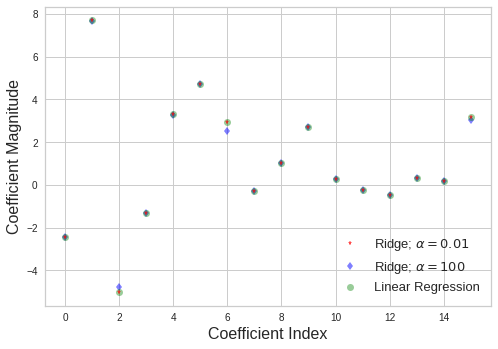

In [70]:
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

Higher the alpha value more restriction on the coefficient.

In [71]:
from sklearn.linear_model import LassoCV

Use the LassoCV algorithm to find the optimal alpha value using cross-validation
= 10 with max_iter=100000
- Provide the alpha value of the LassoCV model (tuned model)
- Provide the prediction and mean squared error of the tuned model
- What are the tuned model coefficients? What variables were not used in the 
model and why

In [72]:
from sklearn import metrics
import numpy as np

lm = LinearRegression()
lm.fit(X_train,y_train)
#predictions on train data
x_pred = lm.predict(X_train)
x_pred = x_pred.reshape(-1,1)
#Prediction of validation data
y_predictions = lm.predict(X_test)
y_predictions= y_predictions.reshape(-1,1)
def scores_(y,x):
  print('MAE:', metrics.mean_absolute_error(y, x))
  print('MSE:', metrics.mean_squared_error(y, x))
  print('RMSE:', np.sqrt(metrics.mean_squared_error(y, x)))
  print('R2 Score:' ,metrics.r2_score(y,x))
  print('InSample_accuracy')
scores_(y_train, x_pred)
print('---------------------------')
print('OutSample_accuracy')

scores_(y_test,y_predictions  )

MAE: 206.97301347041605
MSE: 87651.19099251284
RMSE: 296.0594382763584
R2 Score: 0.5520895361944755
InSample_accuracy
---------------------------
OutSample_accuracy
MAE: 273.32998709680646
MSE: 142206.1659204885
RMSE: 377.10232818227007
R2 Score: 0.36411062972954944
InSample_accuracy


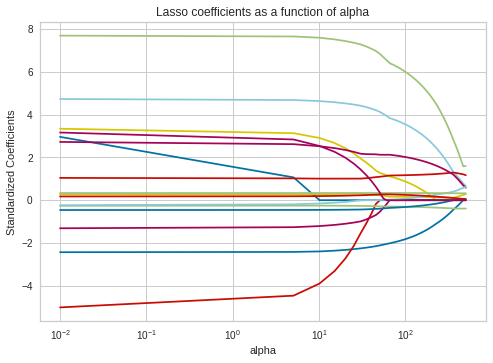

In [73]:
import numpy as np
import matplotlib.pyplot as plt

alphas = np.linspace(0.01,500,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

## Lasso with optimal alpha
- To find the optimal value of alpha, we use scikit learns lasso linear model with iterative fitting along a regularization path (LassoCV). The best model is selected by cross-validation.

k-fold cross validation

In [74]:

from sklearn.linear_model import LassoCV

# Lasso with 5 fold cross-validation
model = LassoCV(cv=5, random_state=0, max_iter=10000)

# Fit model
model.fit(X_train, y_train)

LassoCV(cv=5, max_iter=10000, random_state=0)

The coefficient for a term represents the change in the mean response associated with a change in that term

In [75]:
model.alpha_


520.5910336949936

In [76]:
# Set best alpha
lasso_best = Lasso(alpha=model.alpha_)
lasso_best.fit(X_train, y_train)


Lasso(alpha=520.5910336949936)

In [77]:
print(list(zip(lasso_best.coef_, X)))


[(-0.0, 475.0), (1.614163444604025, 480.0), (0.0, 500.0), (0.0, 91.5), (0.0, 750.0), (0.5964590825918805, 70.0), (0.0, 100.0), (-0.38733855982707815, 75.0), (1.1419021844672252, 1100.0), (0.5198384071130577, 517.143), (0.30626655307480083, 512.5), (0.6434119079224992, 550.0), (0.0, 700.0), (0.3245315840781221, 240.0), (0.05519968440012962, 775.0), (0.0, 175.0)]


In [78]:
print('R squared training set', round(lasso_best.score(X_train, y_train)*100, 2))
print('R squared test set', round(lasso_best.score(X_test, y_test)*100, 2))

R squared training set 51.53
R squared test set 38.75


In [79]:
mean_squared_error(y_test, lasso_best.predict(X_test))


136978.70925812752

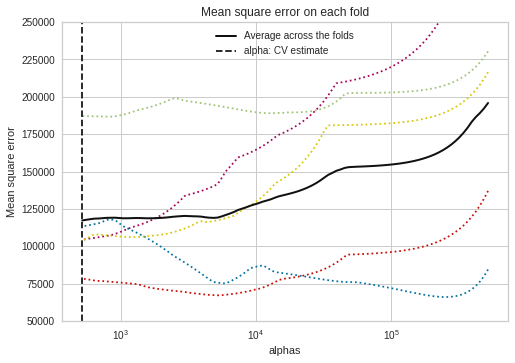

In [80]:
plt.semilogx(model.alphas_, model.mse_path_, ":")
plt.plot(
    model.alphas_ ,
    model.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    model.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
)

plt.legend()
plt.xlabel("alphas")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")
plt.axis("tight")

ymin, ymax = 50000, 250000
plt.ylim(ymin, ymax);

In [81]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

alphas = 10**np.linspace(10,-2,100)*0.5
alphas
lassocv = LassoCV(alphas = alphas, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


142174.58412870468